# Imports

In [14]:
# importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

In [15]:
# Constants
NUM_CLASSES = 5
IMG_SIZE = 64

# Define the input layer
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Add a resizing layer to resize the images to a consistent shape
x = layers.Resizing(IMG_SIZE, IMG_SIZE)(inputs)
# Add a rescaling layer to rescale the pixel values to the [0, 1] range
x = layers.Rescaling(1./255)(x)
# Add some data augmentation layers to apply random transformations during training
x = layers.RandomFlip("horizontal")(x)
# Uncomment the following line if RandomShear is needed
# x = layers.RandomShear(0.2)(x)
x = layers.RandomZoom(0.2)(x)

# Add the convolutional and pooling layers
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

# Flatten the output of the convolutional layers
x = layers.Flatten()(x)
# x = layers.GlobalAveragePooling2D()(x)

# Add the dense layers
x = layers.Dense(128, activation="relu")(x)
# SOFT_MAX ALS ACTIVATION
outputs = layers.Dense(NUM_CLASSES, activation="sigmoid")(x)

# Create the model
model_GAP = Model(inputs=inputs, outputs=outputs, name="base_model_project")

# Compile the model
model_GAP.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_GAP.summary()

Model: "base_model_project"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,733 (3.10 MB)

 Trainable params: 813,733 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Set the parameters for your data
batch_size = 32
image_size = (64, 64)
validation_split = 0.3

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='./train/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='./train/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Ensure the dataset can generate enough batches (so keep on generating when needed)
train_ds = train_ds.repeat()
validation_ds = validation_ds.repeat()

Found 2026 files belonging to 5 classes.
Using 1419 files for training.
Found 2026 files belonging to 5 classes.
Using 607 files for validation.


In [17]:
history = model_GAP.fit(train_ds,
    validation_data = validation_ds,
    steps_per_epoch = 100,
    validation_steps = 30, # we have a .30 validation split, so we'll use 70% less batches for validation
    epochs = 20
    )

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2516 - loss: 1.6626 - val_accuracy: 0.3858 - val_loss: 1.4458
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3863 - loss: 1.4269 - val_accuracy: 0.3413 - val_loss: 1.5895
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5563 - loss: 1.1735 - val_accuracy: 0.4838 - val_loss: 1.3484
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6299 - loss: 1.0098 - val_accuracy: 0.5835 - val_loss: 1.1073
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7103 - loss: 0.7977 - val_accuracy: 0.5693 - val_loss: 1.1832
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7525 - loss: 0.6961 - val_accuracy: 0.5209 - val_loss: 1.4928
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7898 - loss: 0.6011 - val_accuracy: 0.7286 - val_loss: 0.8112
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8138 - loss: 0.5148 - val_accu

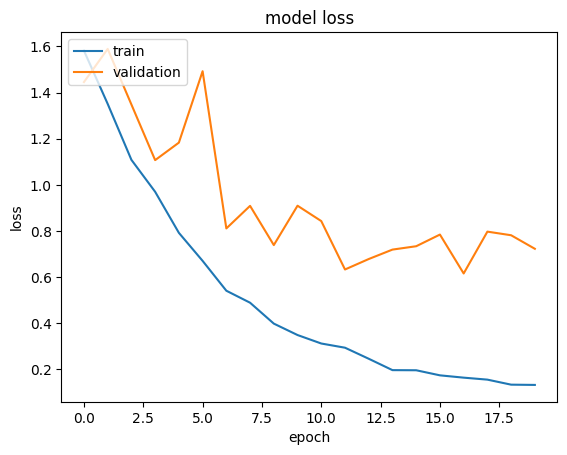

In [18]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plotLosses(history)

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

In [21]:
test_image =image.load_img(path="./test/test/471.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model_GAP.predict(test_image)

# train_ds.class_indices
if result[0][0] >= 0.51:
    prediction = "cat" # (0)
elif result[0][0] >= 0.51:
    prediction = "cheetah" # (1)
elif result[0][0] >= 0.51:
    prediction = "leopard" # (2)
elif result[0][0] >= 0.51:
    prediction = "lion" # (3)
else:
    prediction = "tiger" # (4)
    
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
cat
